# Week 1 Challenge - Linear Regression
Author: Jing (Thomas) Zhang 

## Two variables

In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# read training dataset
df_train = pd.read_csv('challenge_dataset.txt', header=None)
x_values = df_train[[0]]
y_values = df_train[[1]]

In [3]:
# train model on data
reg = linear_model.LinearRegression()
reg.fit(x_values, y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# The coefficients
print('Coefficients: \n', reg.coef_)
print('Our linear model is: y = {:.3f}*x'
     .format(reg.coef_[0][0]))

Coefficients: 
 [[ 1.19303364]]
Our linear model is: y = 1.193*x


In [5]:
# The mean squared error (cost)
y_true = y_values 
y_pred = reg.predict(x_values)

print("Mean squared error: {:.3f}"
      .format(mean_squared_error(y_true, y_pred)))

# Explained variance score (r suqare): 1 is perfect prediction
print('Variance score: {:.3f}'
      .format(reg.score(x_values, y_values)))

Mean squared error: 8.954
Variance score: 0.702


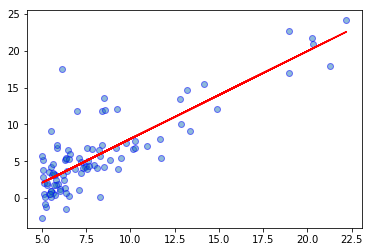

In [6]:
# visualize results
plt.scatter(x_values, y_values, alpha = 0.5, edgecolors = 'b')
plt.plot(x_values, y_pred, 'r')
plt.show()

## Three variables

Create an additional feature `x2`

In [7]:
df_train.columns = ['x1', 'y']
df_train.head()

,x1,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
x2 = pd.Series(np.random.rand(97) * 10, index=df_train.index)
df_3d_train = df_train[['x1']]
df_3d_train['x2'] = x2
df_3d_train['y'] = df_train[['y']]
df_3d_train.head()

,x1,x2,y
0,6.1101,2.702318,17.5920
1,5.5277,2.129123,9.1302
2,8.5186,6.729575,13.6620
3,7.0032,5.609693,11.8540
4,5.8598,2.549763,6.8233


In [9]:
x_3d_values = df_3d_train[['x1','x2']]
y_3d_values = df_3d_train[['y']]

In [10]:
# train model on data
reg_3d = linear_model.LinearRegression()
reg_3d.fit(x_3d_values, y_3d_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# The coefficients
print('Coefficients: \n', reg_3d.coef_)
coef_x1, coef_x2 = tuple(reg_3d.coef_[0])
print('Our linear model is: y = {:.3f}*x1 + {:.3f}*x2'
     .format(coef_x1, coef_x2))

Coefficients: 
 [[ 1.1875793   0.08535597]]
Our linear model is: y = 1.188*x1 + 0.085*x2


In [12]:
# The mean squared error (cost)
y_3d_true = y_3d_values 
y_3d_pred = reg_3d.predict(x_3d_values)

print("Mean squared error: {:.3f}"
      .format(mean_squared_error(y_3d_true, y_3d_pred)))

# Explained variance score (r suqare): 1 is perfect prediction
print('Variance score: {:.3f}'
      .format(reg_3d.score(x_3d_values, y_3d_values)))

Mean squared error: 8.888
Variance score: 0.704


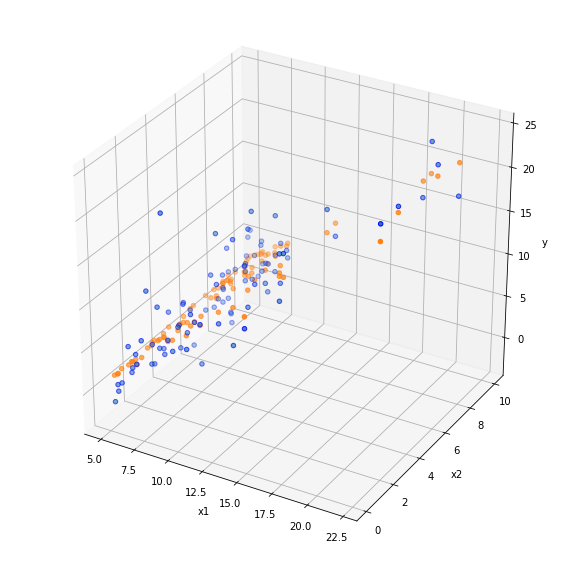

In [13]:
# visualize 3d results
x1_xs = x_3d_values[['x1']]
x2_ys = x_3d_values[['x2']]
y_true_zs = y_3d_values
y_pred_zs = y_3d_pred

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_xs, x2_ys, y_true_zs, edgecolors = 'b')
ax.scatter(x1_xs, x2_ys, y_pred_zs)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()